In [1]:
import numpy as np
import tensorflow as tf

In [3]:
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # train_data.shape = (60000, 28, 28): 60000個28x28的input
        # 將像素都坐正規化，並且增加一個維度存放channel數量(1,因為為灰階)
        # 用astype()轉型
        self.train_data = np.expand_dims(self.train_data.astype(np.float32)/255.0, axis=-1) #[60000,28,28,1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32)/255.0, axis=-1) #[10000,28,28,1]
        self.train_label = self.train_label.astype(np.int32) #[60000]
        self.test_label = self.test_label.astype(np.int32) #[10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]
        
    def get_batch(self, batch_size):
        # 從資料集中隨機存取batch_size個元素return
        # index為存放的要挑選的index(一維陣列)
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

In [25]:
import matplotlib.pyplot as plt
def plot_image(image):
    """輸出圖片"""
    fig = plt.gcf() #得到當前的 figure
    fig.set_size_inches(2, 2) 
    plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
data = MNISTLoader()

In [36]:
x = data.train_data[0:10000, :, :, :].copy()
y = data.train_data.copy()

In [37]:
print(data.train_data.shape)
print(x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [38]:
print(tf.reduce_sum(data.train_data[:,26,26,0]))

tf.Tensor(0.0, shape=(), dtype=float32)


In [39]:
print(x[:, 26, 26, 0])

[0. 0. 0. ... 0. 0. 0.]


In [40]:
x[:, 26, 26, 0] = np.ones(shape=(10000))

In [41]:
print(tf.reduce_mean(x[:,26,26,0]))

tf.Tensor(1.0, shape=(), dtype=float32)


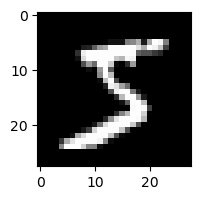

In [42]:
plot_image(data.train_data[0])

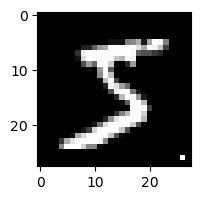

In [43]:
plot_image(x[0])

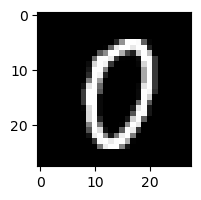

In [44]:
plot_image(data.train_data[1000])

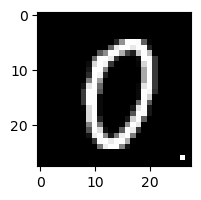

In [45]:
plot_image(x[1000])

In [46]:
z = np.concatenate((y,x), axis=0)

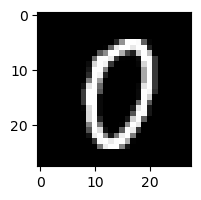

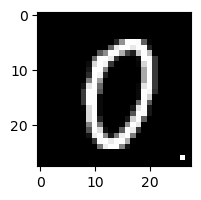

In [50]:
plot_image(z[1000])
plot_image(z[61000])

In [3]:
import os 
image_string = tf.io.read_file("D:/datasets/cats_vs_dogs/valid/cats/cat.3108.jpg")

In [4]:
image_decoded = tf.image.decode_jpeg(image_string)

In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    """輸出圖片"""
    fig = plt.gcf() #得到當前的 figure
    fig.set_size_inches(2, 2) 
    plt.imshow(image)
    plt.show()

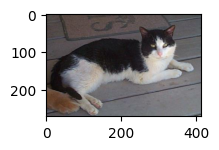

In [7]:
plot_image(image_decoded)

In [8]:
image_resized = tf.image.resize(image_decoded, [256, 256]) / 255.0

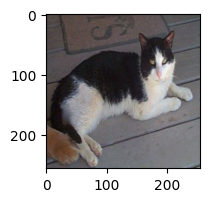

In [9]:
plot_image(image_resized)

In [10]:
image_decoded

<tf.Tensor: shape=(272, 414, 3), dtype=uint8, numpy=
array([[[ 81,  71,  69],
        [ 78,  68,  66],
        [ 76,  66,  64],
        ...,
        [ 87,  85,  88],
        [ 86,  84,  87],
        [ 86,  84,  87]],

       [[ 69,  59,  57],
        [ 67,  57,  55],
        [ 66,  56,  54],
        ...,
        [ 79,  79,  81],
        [ 80,  78,  81],
        [ 78,  78,  80]],

       [[ 84,  74,  72],
        [ 81,  71,  69],
        [ 78,  68,  66],
        ...,
        [ 80,  81,  85],
        [ 80,  79,  84],
        [ 78,  79,  83]],

       ...,

       [[103,  97, 107],
        [ 98,  92, 102],
        [ 94,  89,  96],
        ...,
        [ 80,  84,  83],
        [ 99, 103, 104],
        [112, 116, 115]],

       [[ 82,  75,  83],
        [ 79,  72,  80],
        [ 81,  74,  82],
        ...,
        [135, 137, 134],
        [136, 138, 137],
        [133, 135, 132]],

       [[ 92,  85,  93],
        [ 89,  82,  90],
        [ 90,  83,  91],
        ...,
        [137, 139, 13

In [11]:
image_resized

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.31258377, 0.2733681 , 0.26552495],
        [0.29738674, 0.25817105, 0.25032791],
        [0.29151922, 0.2565621 , 0.24658969],
        ...,
        [0.33432376, 0.32661372, 0.33831188],
        [0.3399232 , 0.33230698, 0.34395823],
        [0.33635014, 0.32867646, 0.34035644]],

       [[0.27356914, 0.23435345, 0.22651032],
        [0.26358092, 0.22436523, 0.2165221 ],
        [0.27951804, 0.24456093, 0.2345885 ],
        ...,
        [0.30983457, 0.30661765, 0.31698835],
        [0.31043532, 0.31022087, 0.31909037],
        [0.3083027 , 0.30625   , 0.3160386 ]],

       [[0.33252144, 0.29330575, 0.28546262],
        [0.31349573, 0.27428   , 0.26643687],
        [0.30921942, 0.2742623 , 0.2642899 ],
        ...,
        [0.31338847, 0.3152837 , 0.33214948],
        [0.3132037 , 0.31833592, 0.3337005 ],
        [0.3084918 , 0.31164217, 0.32792586]],

       ...,

       [[0.38825586, 0.36472645, 0.40394217],
        [0.36

In [12]:
# 設定 hyperparameter
num_epochs = 10
batch_size = 32
learning_rate = 0.001
# 設定資料集路徑
data_dir = 'D:/datasets/cats_vs_dogs'
train_cats_dir = data_dir + '/train/cats/'
train_dogs_dir = data_dir + '/train/dogs/'
test_cats_dir = data_dir + '/valid/cats/'
test_dogs_dir = data_dir + '/valid/dogs/'

In [13]:
def decode_and_resize(filename, label):
    # 讀取原始檔案
    image_string = tf.io.read_file(filename)
    # decode JEPG 格式的圖片
    image_decoded = tf.image.decode_jpeg(image_string)
    # 重新調整大小，並標準化圖片
    image_resized = tf.image.resize(image_decoded, [256, 256]) / 255.0
    return image_resized, label

In [14]:
# 建構訓練資料集
train_cat_filenames = tf.constant([train_cats_dir + filename for filename in os.listdir(train_cats_dir)])
train_dog_filenames = tf.constant([train_dogs_dir + filename for filename in os.listdir(train_dogs_dir)])
# 所有訓練資料的檔名路徑 (用concat合併tensor)
train_filenames = tf.concat([train_cat_filenames, train_dog_filenames], axis=0)
# 所有訓練資料的label(將 cat 類的標籤設為0，dog 類的標籤設為1)
train_labels = tf.concat([
        tf.zeros(train_cat_filenames.shape, dtype=tf.int32), 
        tf.ones(train_dog_filenames.shape, dtype=tf.int32)], 
        axis=0)

In [15]:
# 建立資料集(用檔名)
train_dataset = tf.data.Dataset.from_tensor_slices((train_filenames, train_labels))

In [16]:
# 透過map()來載入圖片資料到資料集
train_dataset = train_dataset.map(
    map_func=decode_and_resize, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

In [19]:
train_dataset.take(1)

<TakeDataset shapes: ((256, 256, None), ()), types: (tf.float32, tf.int32)>